# Single tone

Install all dependencies

In [1]:
!pip install numpy matplotlib scipy

Import dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

Generate a single CW tone and plot it

Amplitude = 10, f = 7.81Hz, sampling frequency = 200Hz, N = 256, spectral resolution = 0.78125Hz


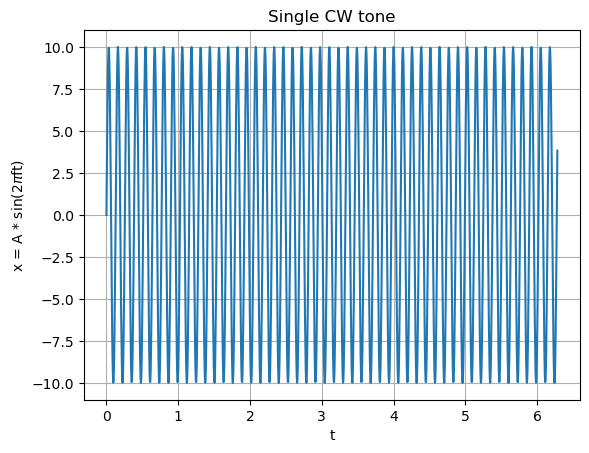

In [11]:
A = 10
fs = 200
N = 256
spectral_resolution = fs / N
f = 10 * spectral_resolution
print(f"Amplitude = {A}, f = {f:.2f}Hz, sampling frequency = {fs}Hz, N = {N}, spectral resolution = {spectral_resolution}Hz")
t = np.arange(0, 2 * np.pi, 1 / fs)
x = A * np.sin(2 * np.pi * f * t)
plt.figure()
plt.grid()
plt.plot(t, x)
plt.title("Single CW tone")
plt.xlabel("t")
plt.ylabel(r"x = A * sin(2$\pi$ft)")
plt.show()

Calculate single-sided spectrum first

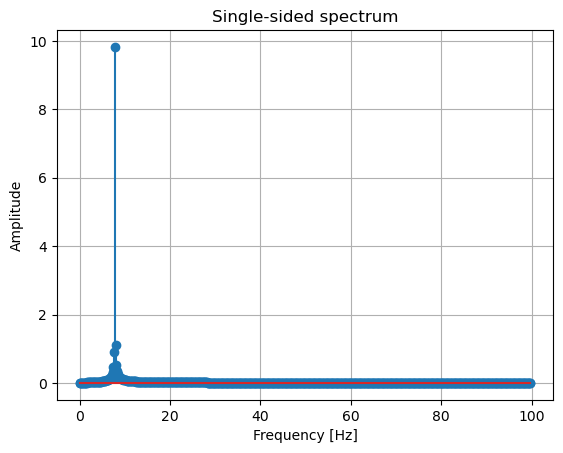

In [4]:
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(X), 1 / fs)
X = np.abs(X) / len(X)
X = X[:len(X) // 2]
X[1 : -1] = 2 * X[1 : -1]
freqs = freqs[:len(freqs) // 2]
plt.figure()
plt.grid()
plt.stem(freqs, X)
plt.title("Single-sided spectrum")
plt.xlabel("Frequency [Hz]")                                                                                                                                                 
plt.ylabel("Amplitude")
plt.show()

Calculate double-sided spectrum

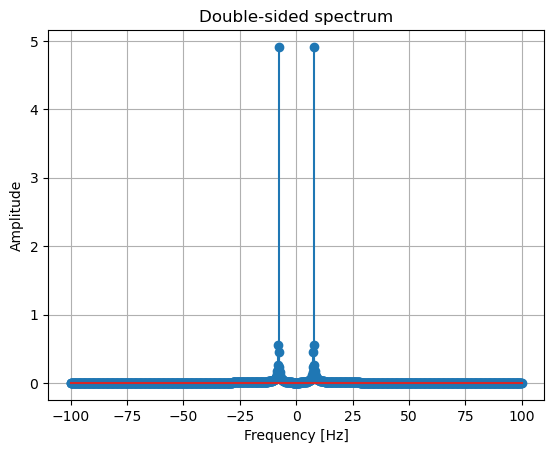

In [5]:
X = np.fft.fftshift(np.fft.fft(x))
freqs = np.fft.fftshift(np.fft.fftfreq(len(X), 1 / fs))
magnitude = np.abs(X) / len(X)
plt.figure()
plt.grid()
plt.stem(freqs, magnitude)
plt.title("Double-sided spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

Plot phase spectrum

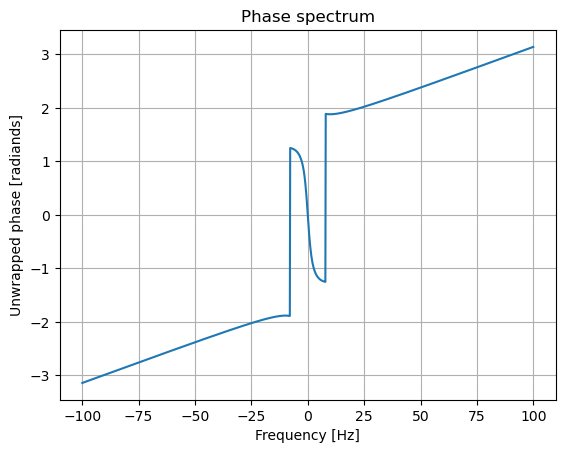

In [6]:
phase = np.unwrap(np.angle(X))
plt.figure()
plt.grid()
plt.plot(freqs, phase)
plt.title("Phase spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Unwrapped phase [radiands]")
plt.show()

Perform IQ sampling

In [7]:
x_i = x * np.cos(2 * np.pi * f * t)
x_q = -x * np.sin(2 * np.pi * f * t)
numtaps = 101
fcutoff = 1.5
coeffs = firwin(numtaps, fcutoff, fs = fs)
x_i = lfilter(coeffs, 1.0, x_i)
x_q = lfilter(coeffs, 1.0, x_q)
x = x_i + 1.0j * x_q

Recompute double-sided spectrum

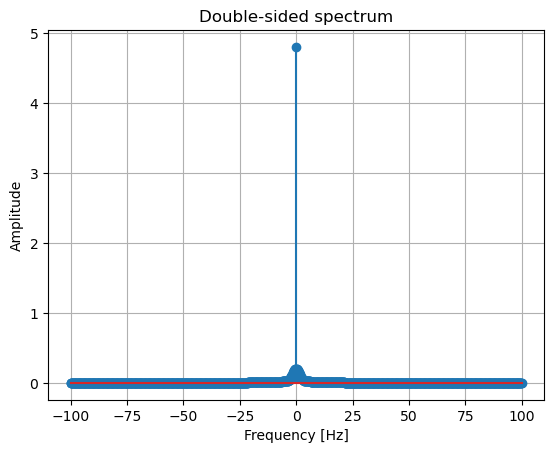

In [8]:
X = np.fft.fftshift(np.fft.fft(x))
freqs = np.fft.fftshift(np.fft.fftfreq(len(X), 1 / fs))
magnitude = np.abs(X) / len(X)
plt.figure()
plt.grid()
plt.stem(freqs, magnitude)
plt.title("Double-sided spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

Recompute phase spectrum once again

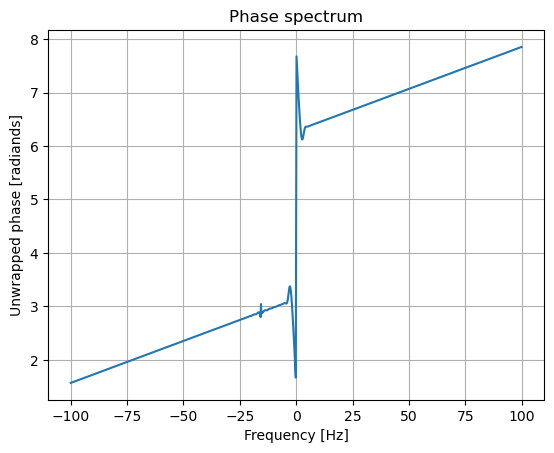

In [9]:
phase = np.unwrap(np.angle(X))
plt.figure()
plt.grid()
plt.plot(freqs, phase)
plt.title("Phase spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Unwrapped phase [radiands]")
plt.show()

All copyright reserved @2025 Ericsson